# Better life index
### Get the data from https://homl.info/4

In [2]:
import urllib 
import os 
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

# change matplot lib settings 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Matplotlib is building the font cache; this may take a moment.


In [3]:
# define root location from where the data needs to be downloaded 
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [4]:
# create fodler structure to store the data from the website 
datapath = os.path.join("DATA", "Chapter1", "lifesat")

if not os.path.exists(datapath):
    os.makedirs(datapath)

In [5]:
target_files = os.listdir(datapath)
target_files

['oecd_bli_2015.csv', 'gdp_per_capita.csv']

### oecd_bli_2015.csv can be downloaded from 
https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD&dq=...&to[TIME]=false&ly[cl]=INDICATOR&ly[rs]=INEQUALITY&ly[rw]=LOCATION&vw=tb
<br><br><br>
This is imporatant to note - <br>
INEQUALITY Column has different values like Men, Women, Low, High, and Total. We are picking only Total 

In [6]:
# download the data 
import urllib.request

# iterate over files and download if not already downloaded 
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):

    # check if file already present in list
    if filename not in target_files:
        print (f"Downloading {filename}")
        url = DOWNLOAD_ROOT + 'datasets/lifesat/' + filename 
        urllib.request.urlretrieve(url, os.path.join(datapath, filename))

In [7]:
def prepare_country_stat(df_oecd:pd.DataFrame=pd.DataFrame(), df_gdp:pd.DataFrame=pd.DataFrame(), full_stats:bool=False):

    # Dice the data and get only inequality set to "TOT" value 
    df_oecd = df_oecd[df_oecd["INEQUALITY"] == "TOT"]

    # use Indicator column to pivot the data and get the count 
    df_oecd = df_oecd.pivot(index="Country", columns="Indicator", values="Value")

    # rename the name if GDP dataframe column from 2015 to GDP Per Capita 
    df_gdp.rename(columns={"2015" : "GDP per capita"}, inplace=True)
    df_gdp.set_index("Country", inplace=True)

    # merge the datasets 
    df_full_stats = pd.merge(left=df_oecd, right=df_gdp, left_index=True, right_index=True)
    df_full_stats.sort_values(by="GDP per capita", inplace=True)

    # remove set of indcies 
    remove_indices = [0, 1, 6, 8, 33, 34, 35]

    # get the keep indices 
    keep_indices = list(set(range(36)) - set(remove_indices))

    # Get the full or partial country stats based on the full_country_stats parameters 
    if full_stats:
        return df_full_stats[["GDP per capita", "Life satisfaction"]], None

    return df_full_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices], df_full_stats[["GDP per capita", "Life satisfaction"]]

In [ ]:
# read downloaded csvs to Pandas dataframe 
df_oecd = pd.read_csv(os.path.join(datapath, "oecd_bli_2015.csv"), thousands=",")
df_gdp = pd.read_csv(os.path.join(datapath, "gdp_per_capita.csv"), thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

# Check OECD Data

In [9]:
df_oecd.shape

(3292, 17)

In [10]:
df_oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [11]:
df_oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
# check the shape of dataframe after taking only "TOT" into consideration 
df_oecd[df_oecd["INEQUALITY"] == "TOT"].shape


(888, 17)

In [11]:
# check the values of indicator column 
df_oecd[df_oecd["INEQUALITY"] == "TOT"]["Indicator"].value_counts()


Dwellings without basic facilities           37
Housing expenditure                          37
Employees working very long hours            37
Homicide rate                                37
Assault rate                                 37
Life satisfaction                            37
Self-reported health                         37
Life expectancy                              37
Voter turnout                                37
Consultation on rule-making                  37
Water quality                                37
Air pollution                                37
Years in education                           37
Student skills                               37
Educational attainment                       37
Quality of support network                   37
Personal earnings                            37
Long-term unemployment rate                  37
Job security                                 37
Employment rate                              37
Household net financial wealth          

In [12]:
df_oecd[df_oecd["INEQUALITY"] == "TOT"].pivot(index="Country", columns="Indicator", values="Value").head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


# GDP Dataframe

In [13]:
df_gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [14]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


# Get Full country Stats

In [16]:
# Get full country stats 
full_country_stats, _ = prepare_country_stat(df_oecd.copy(), df_gdp.copy(), full_stats=True)

# get the country and missing data 
country_stats, missing_data = prepare_country_stat(df_oecd.copy(), df_gdp.copy(), full_stats=False)

In [17]:
# check paritial country stats 
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [19]:
missing_data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


# Perpare Data

In [80]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
X[:10], y[:10]

(array([[ 9054.914],
        [ 9437.372],
        [12239.894],
        [12495.334],
        [15991.736],
        [17288.083],
        [18064.288],
        [19121.592],
        [20732.482],
        [25864.721]]),
 array([[6. ],
        [5.6],
        [4.9],
        [5.8],
        [6.1],
        [5.6],
        [4.8],
        [5.1],
        [5.7],
        [6.5]]))

<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

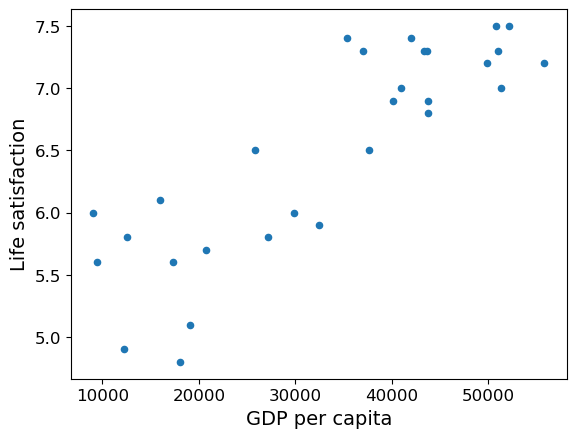

In [23]:
# plot these points on scatter plot 
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")

In [24]:
# check for following countries 
country_stats.loc[["Hungary", "Korea", "France", "Australia", "United States"]]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


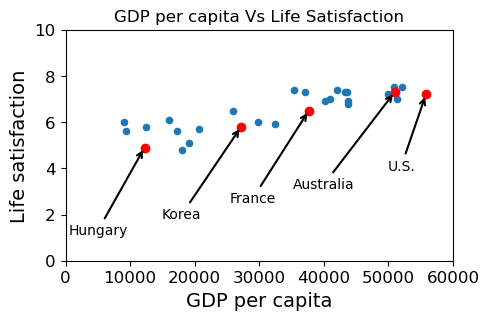

In [25]:
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3))

# set x and y axis value range
plt.axis([0, 60000, 0, 10])

position_text = {
    "Hungary" : (5000, 1), 
    "Korea" : (18000, 1.7), 
    "France" : (29000, 2.4), 
    "Australia" : (40000, 3.0), 
    "United States" : (52000, 3.8)
}

# iterate over position text 
for country, pos in position_text.items():
    pos_data_x, pos_data_y = country_stats.loc[country]

    if country == "United States": 
        country = "U.S."

    plt.annotate(country, xy=[pos_data_x, pos_data_y], xytext=pos, horizontalalignment="center", verticalalignment="bottom", 
                 arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
                 fontsize=10, color="black")
    
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("GDP per capita Vs Life Satisfaction")
plt.show()

# Above plot shows some linear relationship between points

### Create some arbitrary lines for better understanding

y = theta_0 + theta_1 * X

Text(5000, 8.2, '$\\theta_1=-5 \\times 10^{-5}$')

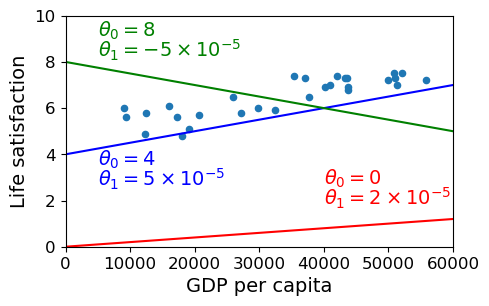

In [32]:
# create 3 possible lines on depicting linear relationship 
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3))

plt.axis([0, 60000, 0, 10])

# create 1000 evenly spaced data points between 0 and 60000 
X_ = np.linspace(0, 60000, 1000)

# create RED line where theta_0 (intercept) = 0 and theta_1(slope) = 2 * 10^-5
plt.plot(X_, 2*X_/100000, "r")
plt.text(40000, 2.7, r"$\theta_0=0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1=2 \times 10^{-5}$", fontsize=14, color="r")

# create BLUE line where theta_0 (intercept) = 4 and theta_1(slope) = 5 * 10^-5
plt.plot(X_, 4 + 5*X_/100000, "b")
plt.text(5000, 3.5, r"$\theta_0=4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1=5 \times 10^{-5}$", fontsize=14, color="b")

# create GREEN line where theta_0 (intercept) = 8 and theta_1(slope) = -8 * 10^-5
plt.plot(X_, 8 - 5*X_/100000, "g")
plt.text(5000, 9.1, r"$\theta_0=8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1=-5 \times 10^{-5}$", fontsize=14, color="g")

# Model Training - Linear Regression

In [33]:
# Create linear regression mode 
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Predict using trained model for Cyprus
X_new = [[22587]]
print (model.predict(X_new))

[[5.96242338]]


In [36]:
# Predict using trained model for Korea 
X_new = [[27195.197]]
print (model.predict(X_new))

[[6.18875703]]


In [37]:
# Get theta values for the linear regression mode 
model.intercept_, model.coef_

(array([4.8530528]), array([[4.91154459e-05]]))

In [38]:
t0, t1 = model.intercept_[0], model.coef_[0][0]

Text(5000, 1.8, '$\\theta_1=4.91 \\times 10^{-5}$')

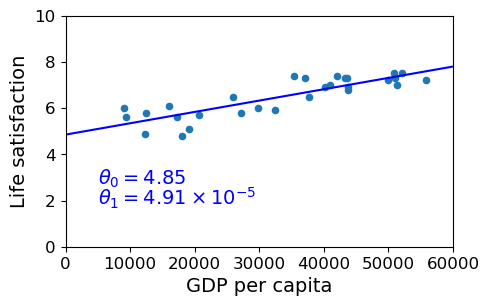

In [102]:
# build a line using these theta values 
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3))

plt.axis([0, 60000, 0, 10])

# create 1000 evenly spaced data points between 0 and 60000 
X_ = np.linspace(0, 60000, 1000)

# create RED line where theta_0 = model.intercept and theta_1 = model.coef_
plt.plot(X_, t0 + t1 * X_, "b")
plt.text(5000, 2.7, r"$\theta_0=4.85$", fontsize=14, color="b")
plt.text(5000, 1.8, r"$\theta_1=4.91 \times 10^{-5}$", fontsize=14, color="b")

# Make prediction on missing data

In [43]:
X_test = np.c_[missing_data["GDP per capita"]]
y_test = np.c_[missing_data["Life satisfaction"]]

y_pred = model.predict(X_test)
y_pred[:10]

array([[5.27888362],
       [5.2955476 ],
       [5.29778894],
       [5.31657353],
       [5.45422065],
       [5.4667667 ],
       [5.5082973 ],
       [5.63849404],
       [5.70063402],
       [5.70216471]])

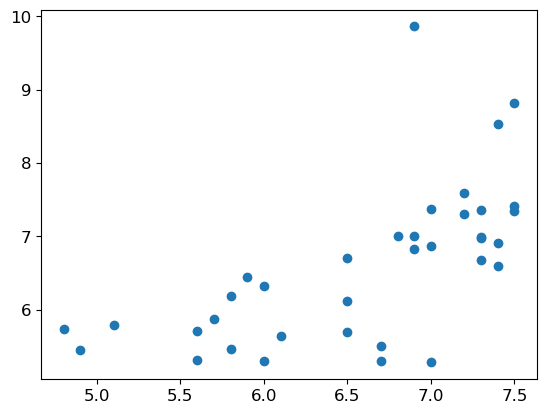

In [ ]:
# Visualize the data deviation between test and predicted values 
plt.scatter(y_test, y_pred)

### Plot countries on predicted  line 

In [57]:
# check the data on scatter plot 
position_text_2 = {
    "Brazil" : (1000, 9.0), 
    "Mexico" : (11000, 9.0), 
    "Chile" : (20000, 9.0), 
    "Czech Republic" : (35000, 9.0), 
    "Norway" : (60000, 3), 
    "Switzerland" : (72000, 3.0), 
    "Luxembourg" : (90000, 3.0)
}

Text(5000, 1.8, '$\\theta_1=4.91 \\times 10^{-5}$')

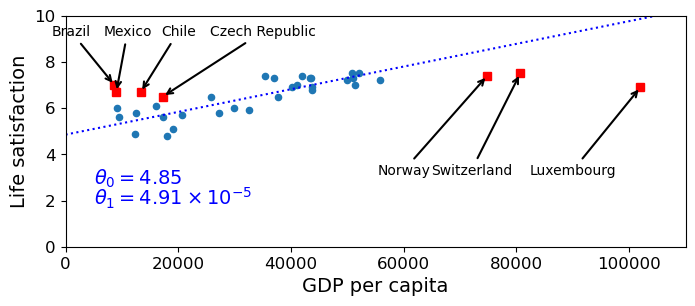

In [58]:
# build a line using these theta values 
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# iterate over position text 
for country, pos in position_text_2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]

    if country == "United States": 
        country = "U.S."

    plt.annotate(country, xy=[pos_data_x, pos_data_y], xytext=pos, horizontalalignment="center", verticalalignment="bottom", 
                 arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
                 fontsize=10, color="black")
    
    plt.plot(pos_data_x, pos_data_y, "rs")

# create 1000 evenly spaced data points between 0 and 60000 
X_ = np.linspace(0, 110000, 1000)

# create RED line where theta_0 = model.intercept and theta_1 = model.coef_
plt.plot(X_, t0 + t1 * X_, "b:")
plt.text(5000, 2.7, r"$\theta_0=4.85$", fontsize=14, color="b")
plt.text(5000, 1.8, r"$\theta_1=4.91 \times 10^{-5}$", fontsize=14, color="b")

# With above its evident missing data do not lie on the line. 
# Train with sufficient data now - Full Country

In [59]:
# train on complete data 
lin_reg_full = sklearn.linear_model.LinearRegression()
X_full = np.c_[full_country_stats["GDP per capita"]]
y_full = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(X_full, y_full)

LinearRegression()

In [60]:
# get theta0 and theta1 values 
t0_full, t1_full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
t0_full, t1_full

(np.float64(5.763029861307918), np.float64(2.317733704739607e-05))

Text(65000, 1.8, '$\\theta_1=2.32 \\times 10^{-5}$')

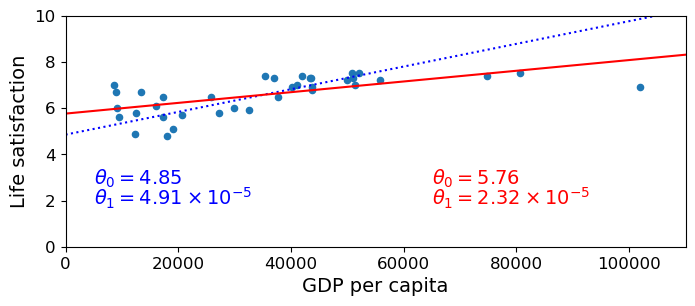

In [66]:
# build a line using these theta values 
full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# create 1000 evenly spaced data points between 0 and 60000 
X_ = np.linspace(0, 110000, 1000)

# create BLUE line where theta_0 = model.intercept and theta_1 = model.coef_
plt.plot(X_, t0 + t1 * X_, "b:")
plt.text(5000, 2.7, r"$\theta_0=4.85$", fontsize=14, color="b")
plt.text(5000, 1.8, r"$\theta_1=4.91 \times 10^{-5}$", fontsize=14, color="b")

# create RED line wheree theta_1 = lin_reg_full.intercept and theta_1 = lin_reg_full.coef
plt.plot(X_, t0_full + t1_full * X_, "r")
plt.text(65000, 2.7, r"$\theta_0=5.76$", fontsize=14, color="r")
plt.text(65000, 1.8, r"$\theta_1=2.32 \times 10^{-5}$", fontsize=14, color="r")

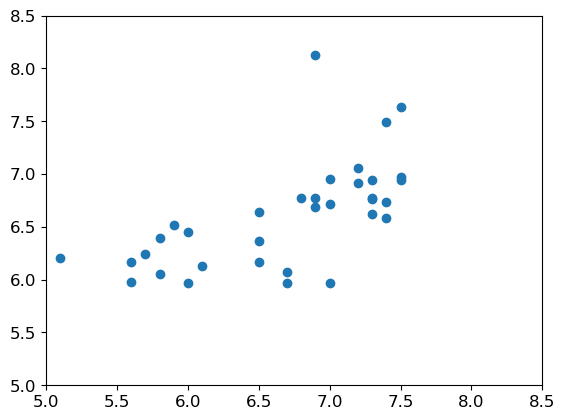

In [70]:
# plot actual vs predicted 
y_pred_full = lin_reg_full.predict(X_full)
plt.axis([5, 8.5, 5, 8.5])
plt.scatter(y_full, y_pred_full)

# Apply Regularization 

In [93]:
lin_reg_full.score(X_full, y_full)

0.40410998750014093

In [94]:
lin_reg_full.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [96]:
from sklearn.linear_model import Ridge 

# Alpha value can be determined using RidgeCV by providing variety/range of alpha values 
ridge_reg = Ridge(alpha=10**9.5)

# get the data 
X_sample = np.c_[full_country_stats["GDP per capita"]]
y_sample = np.c_[full_country_stats["Life satisfaction"]]

# apply ridge regression 
ridge_reg.fit(X_sample, y_sample)

Ridge(alpha=3162277660.1683793)

In [98]:
t0_ridge, t1_ridge = ridge_reg.intercept_[0], ridge_reg.coef_[0]
t0_ridge, t1_ridge

(np.float64(5.895688219943638), np.float64(1.9429129713026558e-05))

Text(40000, 1.8, '$\\theta_1=2.32 \\times 10^{-5}$')

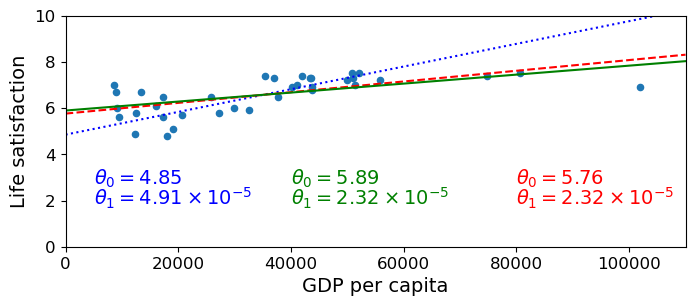

In [101]:
# build a line using these theta values 
full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# create 1000 evenly spaced data points between 0 and 60000 
X_ = np.linspace(0, 110000, 1000)

# create BLUE line where theta_0 = model.intercept and theta_1 = model.coef_
plt.plot(X_, t0 + t1 * X_, "b:")
plt.text(5000, 2.7, r"$\theta_0=4.85$", fontsize=14, color="b")
plt.text(5000, 1.8, r"$\theta_1=4.91 \times 10^{-5}$", fontsize=14, color="b")

# create RED line wheree theta_1 = lin_reg_full.intercept and theta_1 = lin_reg_full.coef
plt.plot(X_, t0_full + t1_full * X_, "r--")
plt.text(80000, 2.7, r"$\theta_0=5.76$", fontsize=14, color="r")
plt.text(80000, 1.8, r"$\theta_1=2.32 \times 10^{-5}$", fontsize=14, color="r")

# create GREEN line wheree theta_1 = ridge_reg.intercept and theta_1 = ridge_reg.coef
plt.plot(X_, t0_ridge + t1_ridge * X_, "g")
plt.text(40000, 2.7, r"$\theta_0=5.89$", fontsize=14, color="g")
plt.text(40000, 1.8, r"$\theta_1=2.32 \times 10^{-5}$", fontsize=14, color="g")


# K Nearest Mean

In [76]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

# create knn model 
knn_model = KNeighborsRegressor(n_neighbors=3)

# Fit the full country data 
knn_model.fit(X_full, y_full)

KNeighborsRegressor(n_neighbors=3)

In [78]:
full_country_stats.loc["Korea"]

GDP per capita       27195.197
Life satisfaction        5.800
Name: Korea, dtype: float64

In [81]:
# predict for Korea 
X_=[[27195.197]]
knn_model.predict(X_)

array([[6.1]])

Text(0.5, 1.0, 'GDP per capita Vs Life satisfaction')

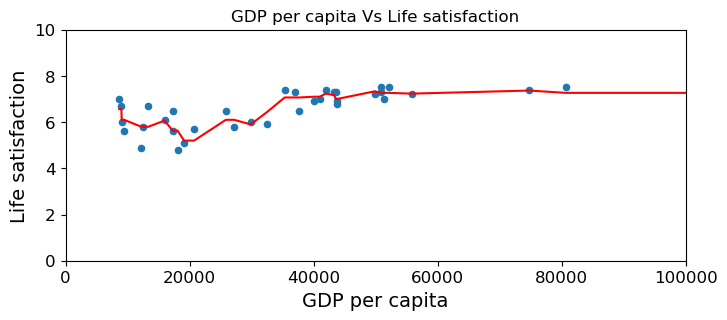

In [87]:
# plot the data 
full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 3))
plt.axis([0, 100000, 0, 10])

# predict the data points 
y_pred_full_knn = knn_model.predict(X_full)

# plot the predictions 
plt.plot(X_full, y_pred_full_knn, "r-")
plt.title("GDP per capita Vs Life satisfaction")

# Overfitting Example

In [88]:
# Create overfitting model. Try with Degree = 2 i.e. polynomial equaltion y = t0 + xt1 + x^2 t2
from sklearn import preprocessing
import sklearn.linear_model
from sklearn.pipeline import Pipeline

# create polynomial features and scaler 
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
scalar = preprocessing.StandardScaler()

# create linear regression model 
lin_reg_poly = sklearn.linear_model.LinearRegression()

# create pipeline for linear regression model 
pipeline_reg = Pipeline([
    ("poly", poly), 
    ("scalar", scalar),
    ("lin_reg", lin_reg_poly)
])

# fit the complete country data 
pipeline_reg.fit(X_full, y_full)

# create 1000 values between 0 and 110000 
X=np.linspace(0, 110000, 1000)

# create curve using equation 
curve = pipeline_reg.predict(X[:, np.newaxis])

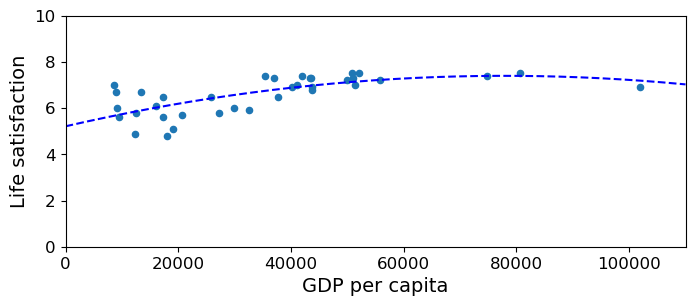

In [89]:
# plot the line for full country data 
full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])
plt.plot(X, curve, "b--")

# Overfitting with higher degree

In [90]:
# create polynomial features and scaler 
poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scalar = preprocessing.StandardScaler()

# create linear regression model 
lin_reg_poly = sklearn.linear_model.LinearRegression()

# create pipeline for linear regression model 
pipeline_reg = Pipeline([
    ("poly", poly), 
    ("scalar", scalar),
    ("lin_reg", lin_reg_poly)
])

# fit the complete country data 
pipeline_reg.fit(X_full, y_full)

# create 1000 values between 0 and 110000 
X=np.linspace(0, 110000, 1000)

# create curve using equation 
curve = pipeline_reg.predict(X[:, np.newaxis])

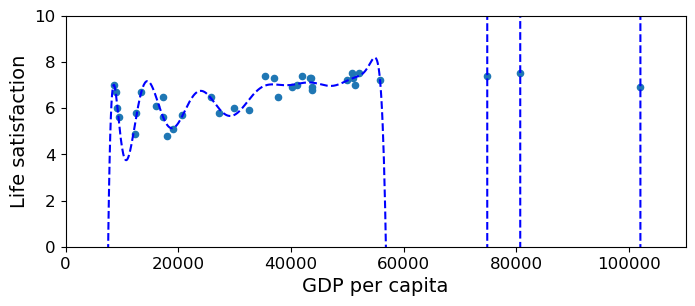

In [91]:
# plot the line for full country data 
full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])
plt.plot(X, curve, "b--")

# Store the Outputs to a location

In [19]:
def save_figure(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    output_image_path = os.path.join("OUTPUT", "images", "Chapter1", f"{fig_id}.{fig_extension}")
    print (f"Saving {fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(output_image_path, format=fig_extension, dpi=resolution)

In [75]:
full_country_stats[["GDP per capita", "Life satisfaction"]].loc[["United States", "Korea", "Hungary", "Australia", "France"]]

,GDP per capita,Life satisfaction
Country,,
United States,55805.204,7.2
Korea,27195.197,5.8
Hungary,12239.894,4.9
Australia,50961.865,7.3
France,37675.006,6.5


# Exercises 

In [ ]:
# Q1. How do you define Machine Learning? 
# Ans: Machine Learning is branch of computer science where machine learns the pattern using the data. 

# Q2. Four types of problem where Machine Larning shines? 
# Ans: a. Email Spam -> One cannot write multiple conditions for finding the email is spam or not. 
#      b. Outlier Detection
#      c. Fraud Detection 
#      d. Predictions 
#      ML is typically useful where there is no algorithimic solution available. 

# Q3. What is label training set? 
# Ans: This is used in supervised learning where model is trained on data and outcome. labelled training set contains the data and outcome. 

# Q4. Two most common supervised learning tasks ?
# Ans: Regression & Classification are two tasks 

# Q5. Four common unsupervised learning? 
# Ans: a) Clustering
#      b) Anamoly detection and novelty detection 
#      c) Visualization & Dimensionality reduction 
#      d) Association rule learning

# Q6. What type of machine learning robot uses for unknown terrain 
# Ans: Reinforcement learning

# Q7. Algo you would use to segment customers into multiple groups 
# Ans: Clustering

# Q8. Email spamming is supervised or unsupervised? 
# Ans: Supervised

# Q9. What is online learning system?
# Ans: Online learning system keeps learning on realtime basis. 

# Q10. What is out of core learning? 
# Ans: when traning data is so huge it cannot fit into the memory. The algo loads parts of data for model to train incrementally. 

# Q11. Learning algo that relies on similarity measure to make predictions? 
# Ans: Instance based learning relies on similarity measure. Model learns by heart. 

# Q12. Difference between model parameters and learning algorithim hyperparameters ? 
# Ans: Model parameters are parameters required for model to perform training. However, parameters required by underlying learning algorithims 
#      to perform the desired task is called hyperparameters. 

# Q13. What do model based learning algo search for? Common strategy they use for success? How do they make predictions 
# Ans: model based learning algo search for patterns that could best fit the training data. Model parameters are tweaked for success. 
#      based on the pattern reconginzed model makes predictions on new set. This is internally done by measuring the distance between training examples 
#      and new data set examples/ 

# Q14. Four main challenges of machine learning? 
# Ans: a) Large data size 
#      b) Sampling must be done in stratified manner 
#      c) Poor Data quaility with lots of noise and outliers
#      d) Irrelevant features 
#      e) Overfitting and underfitting 

# Q15. If model performs well with training data and poorly with test data? 
# Ans: Overfitting must have happened. You can: 
#      a) Perform model regularization i.e. contraint the model by reducing number of features 
#      b) Gather more training data 
#      c) Build model with fewer parameters 

# Q16. What is test set? And why use it? 
# Ans: test set are set on which model validation can be performed to ensure the model is able to generalize well 

# Q17. Use of Validation set? 
# Ans: Generalization error is measured using test set. And different models (lienar, polynomial) are applied to the same test set to adapt
#      Since model has now seen both training and test set. Validation set is another set to perform validation of the model. 

# Q18. what is train-dev set? 
# Ans: Portion of data which is used to train and evaluate a model especially during development and refinement. 

# Q19. What can go wrong when tuining hyerparameters using test set?
# Ans: Model may perform well with test data but may not perform well on new data. 